# Visualizations

In [2]:
import utils.common
import evaluation
import importlib
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [37]:
def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

In [2]:
ml_ae = pd.read_csv('../evals/AE_ML_10_epochs.csv', index_col = 0)
ml_ae_2 = pd.read_csv('../evals/AE_ML_10_epochs_2.csv', index_col=0)
ml_n = pd.read_csv('../evals/NN_ML_10_epochs.csv', index_col=0)
msd_ae = pd.read_csv('../evals/AE_MSD_10_epochs.csv', index_col = 0)
msd_nn = pd.read_csv('../evals/NN_MSD_10_epochs.csv', index_col = 0)

In [3]:
ml_ae_2.name = 'NeuralLogicRec_AE_ML_10_epoch'
ml_ae_2

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
0,0.652330,48,0.023697,0.091610,0.063385,0.119575,0.109566,32,0.701218,0.674837,0.151827,1,0.144618,0.069997,0.084283,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.132343,0.054622
1,0.731179,48,0.038339,0.122724,0.085252,0.123629,0.115570,32,0.763130,0.746471,0.152115,2,0.204053,0.095994,0.116291,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.169591,0.075691
2,0.760323,48,0.038821,0.122339,0.082844,0.120885,0.112857,32,0.751180,0.732762,0.151099,3,0.215354,0.101138,0.122730,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.176131,0.075135
3,0.769244,48,0.038339,0.127733,0.086504,0.122720,0.114944,32,0.745447,0.727308,0.150975,4,0.230899,0.109720,0.133209,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.188991,0.082378
4,0.759930,48,0.040555,0.135343,0.090261,0.124603,0.116555,32,0.758637,0.743215,0.150769,5,0.238360,0.113671,0.137209,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.192319,0.082109
5,0.757961,48,0.041614,0.140256,0.096426,0.125587,0.118557,32,0.753908,0.736426,0.151282,6,0.231996,0.110375,0.133761,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.189978,0.080907
6,0.778054,48,0.039399,0.133128,0.089394,0.122638,0.114383,32,0.746092,0.722856,0.150052,7,0.226071,0.111094,0.133713,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.190154,0.082131
7,0.769527,48,0.039399,0.132357,0.089587,0.122876,0.114833,32,0.745112,0.722708,0.150569,8,0.238470,0.113669,0.137682,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.193351,0.084332
8,0.771007,48,0.043348,0.137848,0.094692,0.123567,0.116266,32,0.757126,0.738580,0.150713,9,0.239421,0.113899,0.137538,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.192700,0.085362
9,0.776163,48,0.037183,0.130527,0.086119,0.123099,0.114847,32,0.737067,0.714867,0.149654,10,0.239860,0.114781,0.138949,NeuralLogicRec_AE_ML_10_epoch,3,4096,0.195501,0.083909


In [4]:
ml_n

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
0,0.729448,48,0.002312,0.008573,0.005105,0.114461,0.102739,32,0.624941,0.608300,0.153773,1,0.152591,0.063888,0.079508,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.116411,0.040059
1,0.734126,48,0.002408,0.008573,0.005491,0.112039,0.099561,32,0.634478,0.619209,0.152154,2,0.151458,0.061822,0.077722,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.113515,0.038418
2,0.729989,48,0.002312,0.008477,0.005587,0.113655,0.101294,32,0.629057,0.612675,0.153453,3,0.152226,0.062146,0.078264,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114509,0.039359
3,0.726818,48,0.002216,0.008670,0.005298,0.111906,0.100026,32,0.625613,0.613215,0.152327,4,0.146374,0.062529,0.077901,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.116675,0.040487
4,0.731694,48,0.002408,0.008766,0.005202,0.113158,0.102055,32,0.630753,0.612282,0.153071,5,0.150177,0.061956,0.077811,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114912,0.039543
5,0.728125,48,0.002312,0.008381,0.005202,0.113586,0.101377,32,0.630443,0.615662,0.153073,6,0.146227,0.061026,0.077099,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114641,0.039469
6,0.733362,48,0.002408,0.008381,0.005394,0.112709,0.101737,32,0.630597,0.615974,0.151863,7,0.151421,0.061855,0.077599,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.114122,0.038348
7,0.723337,48,0.002601,0.009151,0.005683,0.112882,0.104099,32,0.633063,0.615159,0.152705,8,0.145971,0.060849,0.077049,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.115636,0.040337
8,0.717811,48,0.002890,0.009826,0.005972,0.109322,0.099759,32,0.634163,0.618171,0.152972,9,0.150287,0.062603,0.078564,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.115914,0.040041
9,0.719930,48,0.003275,0.010885,0.007128,0.115578,0.105119,32,0.631700,0.615178,0.154509,10,0.150324,0.063295,0.080898,NeuralLogicRec_NN_ML_10_epochs,3,4096,0.120778,0.043675


In [5]:
tuples = [['MovieLens', 'AE'], ['MovieLens', 'Simple'], ['MSD', 'AE'], ['MSD', 'Simple']]
index = pd.MultiIndex.from_tuples(tuples, names=['dataset', 'name'])
comparison = pd.DataFrame([ml_ae_2.loc[9], ml_n.loc[9], msd_ae.loc[9], msd_nn.loc[9]], index=index)
comparison

accuracy  batch_size  coverage@1  coverage@10  coverage@5  \
dataset   name                                                                
MovieLens AE      0.776163          48    0.037183     0.130527    0.086119   
          Simple  0.719930          48    0.003275     0.010885    0.007128   
MSD       AE      0.615584          48    0.172676     0.501043    0.378129   
          Simple  0.514828          48    0.005662     0.023242    0.014601   

                  diversity@10  diversity@5  embedding_dim    epc@10  \
dataset   name                                                         
MovieLens AE          0.123099     0.114847             32  0.737067   
          Simple      0.115578     0.105119             32  0.631700   
MSD       AE          0.229299     0.219616             32  0.934985   
          Simple      0.257474     0.225541             32  0.846082   

                     epc@5     epd@5  epochs_trained     map@1    map@10  \
dataset   name                                                             
MovieLens AE      0.714867  0.149654              10  0.239860  0.114781   
          Simple  0.615178  0.154509              10  0.150324  0.063295   
MSD       AE      0.929920  0.275583              10  0.069461  0.026149   
          Simple  0.834268  0.298964              10  0.053309  0.019939   

                     map@5                             name  nr_hidden_layers  \
dataset   name                                                                  
MovieLens AE      0.138949    NeuralLogicRec_AE_ML_10_epoch                 3   
          Simple  0.080898   NeuralLogicRec_NN_ML_10_epochs                 3   
MSD       AE      0.033759  NeuralLogicRec_AE_MSD_10_epochs                 3   
          Simple  0.025759  NeuralLogicRec_NN_MSD_10_epochs                 3   

                  nr_item_samples  precision@5  recall@5  
dataset   name                                            
MovieLens AE                 4096     0.195501  0.083909  
          Simple             4096     0.120778  0.043675  
MSD       AE                 4096     0.058108  0.029146  
          Simple             4096     0.043718  0.021577

In [6]:
metrics = comparison[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10']].transpose()

In [7]:
print(metrics.to_latex(float_format = "%.3f", bold_rows=True))
metrics

\begin{tabular}{lrrrr}
\toprule
\textbf{dataset} & \multicolumn{2}{l}{MovieLens} & \multicolumn{2}{l}{MSD} \\
\textbf{name} &        AE & Simple &    AE & Simple \\
\midrule
\textbf{map@1       } &     0.240 &  0.150 & 0.069 &  0.053 \\
\textbf{map@5       } &     0.139 &  0.081 & 0.034 &  0.026 \\
\textbf{map@10      } &     0.115 &  0.063 & 0.026 &  0.020 \\
\textbf{diversity@5 } &     0.115 &  0.105 & 0.220 &  0.226 \\
\textbf{diversity@10} &     0.123 &  0.116 & 0.229 &  0.257 \\
\textbf{epc@5       } &     0.715 &  0.615 & 0.930 &  0.834 \\
\textbf{epc@10      } &     0.737 &  0.632 & 0.935 &  0.846 \\
\textbf{epd@5       } &     0.150 &  0.155 & 0.276 &  0.299 \\
\textbf{coverage@1  } &     0.037 &  0.003 & 0.173 &  0.006 \\
\textbf{coverage@5  } &     0.086 &  0.007 & 0.378 &  0.015 \\
\textbf{coverage@10 } &     0.131 &  0.011 & 0.501 &  0.023 \\
\bottomrule
\end{tabular}



dataset      MovieLens                 MSD          
name                AE    Simple        AE    Simple
map@1         0.239860  0.150324  0.069461  0.053309
map@5         0.138949  0.080898  0.033759  0.025759
map@10        0.114781  0.063295  0.026149  0.019939
diversity@5   0.114847  0.105119  0.219616  0.225541
diversity@10  0.123099  0.115578  0.229299  0.257474
epc@5         0.714867  0.615178  0.929920  0.834268
epc@10        0.737067  0.631700  0.934985  0.846082
epd@5         0.149654  0.154509  0.275583  0.298964
coverage@1    0.037183  0.003275  0.172676  0.005662
coverage@5    0.086119  0.007128  0.378129  0.014601
coverage@10   0.130527  0.010885  0.501043  0.023242

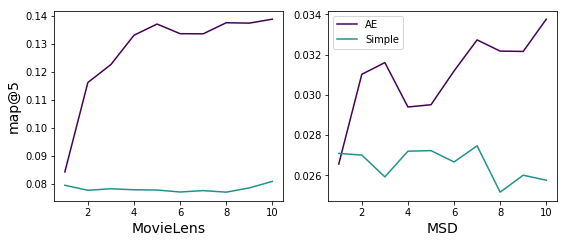

In [52]:
col = get_colors(range(2))
fig = plt.figure(figsize=(9,3.5))
ax1 = fig.add_subplot(121)
ax1.plot(ml_ae_2.epochs_trained, ml_ae_2['map@5'], color=col[0])
ax1.plot(ml_n.epochs_trained, ml_n['map@5'],color=col[1])
ax1.set_xlabel('MovieLens', fontsize=14)
ax1.set_ylabel('map@5', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(ml_ae_2.epochs_trained, msd_ae['map@5'], color=col[0])
ax2.plot(ml_n.epochs_trained, msd_nn['map@5'],color=col[1])
ax2.set_xlabel('MSD', fontsize=14)
plt.legend(['AE', 'Simple'], fontsize=10)
plt.savefig('../plots/NLR_architectures_history.pdf')

In [25]:
msd_div_1 = pd.read_csv('../evals/MSD_div_fix_0.5.csv', index_col = 0)
msd_div_2 = pd.read_csv('../evals/MSD_div_fix_1.0.csv', index_col=0)
msd_div_3 = pd.read_csv('../evals/MSD_div_fix_2.0.csv', index_col=0)
msd_div_4 = pd.read_csv('../evals/MSD_div_fix_4.0.csv', index_col = 0)

In [26]:
ml_div_1 = pd.read_csv('../evals/ML_div_0.25.csv', index_col = 0)
ml_div_2 = pd.read_csv('../evals/ML_div_0.5.csv', index_col = 0)
ml_div_3 = pd.read_csv('../evals/ML_div_1.0.csv', index_col=0)
ml_div_4 = pd.read_csv('../evals/ML_div_2.0.csv', index_col=0)

In [27]:
msd_div_results = pd.DataFrame([msd_div_1.iloc[-1], msd_div_2.iloc[-1], msd_div_3.iloc[-1], msd_div_4.iloc[-1]])
ml_div_results = pd.DataFrame([ml_div_1.iloc[-1], ml_div_2.iloc[-1], ml_div_3.iloc[-1], ml_div_4.iloc[-1]])

In [28]:
print(msd_div_results[['name',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5','coverage@1' ]].to_latex(float_format = "%.3f", index=False))

print(msd_div_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                           name &  diversity@5 &  diversity@10 &  epc@5 &  epd@5 &  coverage@5 &  coverage@1 \\
\midrule
 NeuralLogicRec\_MSD\_div\_fix\_0.5 &        0.240 &         0.241 &  0.918 &  0.283 &       0.347 &       0.156 \\
 NeuralLogicRec\_MSD\_div\_fix\_1.0 &        0.221 &         0.227 &  0.920 &  0.276 &       0.361 &       0.160 \\
 NeuralLogicRec\_MSD\_div\_fix\_2.0 &        0.220 &         0.227 &  0.917 &  0.275 &       0.351 &       0.157 \\
 NeuralLogicRec\_MSD\_div\_fix\_4.0 &        0.228 &         0.233 &  0.916 &  0.279 &       0.356 &       0.157 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                           name &  map@1 &  map@5 &  map@10 \\
\midrule
 NeuralLogicRec\_MSD\_div\_fix\_0.5 &  0.086 &  0.041 &   0.032 \\
 NeuralLogicRec\_MSD\_div\_fix\_1.0 &  0.079 &  0.039 &   0.030 \\
 NeuralLogicRec\_MSD\_div\_fix\_2.0 &  0.084 &  0.040 &   0.031 \\
 NeuralLogicRec\_MSD\_div\_fix\_4.0 &  0.077 &  0.

In [24]:
print(ml_div_results[['name',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5','coverage@1' ]].to_latex(float_format = "%.3f", index=False))

print(ml_div_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                       name &  diversity@5 &  diversity@10 &  epc@5 &  epd@5 &  coverage@5 &  coverage@1 \\
\midrule
 NeuralLogicRec\_ML\_div\_0.25 &        0.112 &         0.121 &  0.734 &  0.148 &       0.122 &       0.058 \\
  NeuralLogicRec\_ML\_div\_0.5 &        0.112 &         0.121 &  0.744 &  0.149 &       0.119 &       0.056 \\
  NeuralLogicRec\_ML\_div\_1.0 &        0.113 &         0.122 &  0.730 &  0.148 &       0.112 &       0.053 \\
  NeuralLogicRec\_ML\_div\_2.0 &        0.112 &         0.121 &  0.743 &  0.148 &       0.114 &       0.055 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                       name &  map@1 &  map@5 &  map@10 \\
\midrule
 NeuralLogicRec\_ML\_div\_0.25 &  0.239 &  0.139 &   0.115 \\
  NeuralLogicRec\_ML\_div\_0.5 &  0.235 &  0.138 &   0.114 \\
  NeuralLogicRec\_ML\_div\_1.0 &  0.242 &  0.140 &   0.116 \\
  NeuralLogicRec\_ML\_div\_2.0 &  0.241 &  0.141 &   0.117 \\
\bottomrule
\end{tabular}



In [30]:
msd_div_1 = pd.read_csv('../evals/MSD_nov_0.25.csv', index_col = 0)
msd_nov_2 = pd.read_csv('../evals/MSD_nov_1.0.csv', index_col = 0)
msd_nov_3 = pd.read_csv('../evals/MSD_nov_2.0.csv', index_col=0)
msd_nov_4 = pd.read_csv('../evals/MSD_nov_4.0.csv', index_col=0)

In [31]:
msd_nov_results = pd.DataFrame([msd_div_1.iloc[-1], msd_nov_2.iloc[-1], msd_nov_3.iloc[-1], msd_nov_4.iloc[-1]])
msd_nov_results

,accuracy,batch_size,coverage@1,coverage@10,coverage@5,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision@5,recall@5
3,0.671477,48,0.161949,0.494190,0.360995,0.234731,0.231357,32,0.924927,0.920605,0.279864,12,0.086500,0.032670,0.041777,NeuralLogicRec_MSD_nov_0.25,3,4096,0.070507,0.035072
3,0.676497,48,0.172080,0.508790,0.374255,0.241184,0.239037,32,0.923806,0.918151,0.284303,16,0.085572,0.031924,0.041100,NeuralLogicRec_MSD_nov_1.0,3,4096,0.069360,0.034808
3,0.682354,48,0.165822,0.509833,0.378278,0.229728,0.227771,32,0.927261,0.922629,0.278817,20,0.083969,0.031646,0.040823,NeuralLogicRec_MSD_nov_2.0,3,4096,0.069571,0.034614
3,0.649112,48,0.168355,0.503874,0.375298,0.237543,0.231988,32,0.924556,0.920069,0.280296,24,0.088229,0.032467,0.042075,NeuralLogicRec_MSD_nov_4.0,3,4096,0.069774,0.035154


In [35]:
print(msd_nov_results[['name',
       'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5','coverage@10' ]].to_latex(float_format = "%.3f", index=False))

print(msd_nov_results[['name',
       'map@1', 'map@5', 'map@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
                        name &  epc@5 &  epc@10 &  epd@5 &  coverage@1 &  coverage@5 &  coverage@10 \\
\midrule
 NeuralLogicRec\_MSD\_nov\_0.25 &  0.921 &   0.925 &  0.280 &       0.162 &       0.361 &        0.494 \\
  NeuralLogicRec\_MSD\_nov\_1.0 &  0.918 &   0.924 &  0.284 &       0.172 &       0.374 &        0.509 \\
  NeuralLogicRec\_MSD\_nov\_2.0 &  0.923 &   0.927 &  0.279 &       0.166 &       0.378 &        0.510 \\
  NeuralLogicRec\_MSD\_nov\_4.0 &  0.920 &   0.925 &  0.280 &       0.168 &       0.375 &        0.504 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
                        name &  map@1 &  map@5 &  map@10 \\
\midrule
 NeuralLogicRec\_MSD\_nov\_0.25 &  0.086 &  0.042 &   0.033 \\
  NeuralLogicRec\_MSD\_nov\_1.0 &  0.086 &  0.041 &   0.032 \\
  NeuralLogicRec\_MSD\_nov\_2.0 &  0.084 &  0.041 &   0.032 \\
  NeuralLogicRec\_MSD\_nov\_4.0 &  0.088 &  0.042 &   0.032 \\
\bottomrule
\end{tabular}

